In [22]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 1000)

In [8]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  

df_analyse.sort_values('date',ascending=True).head()

,date,Albania,Egypt,Germany,Italy,Spain,United Kingdom,US
0,2020-01-22,0,0,0,0,0,0,1
1,2020-01-23,0,0,0,0,0,0,1
2,2020-01-24,0,0,0,0,0,0,2
3,2020-01-25,0,0,0,0,0,0,2
4,2020-01-26,0,0,0,0,0,0,5


In [19]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0 = 1000000 # max susceptible population
beta = 0.4   # infection spread dynamics
gamma = 0.1  # recovery rate

# condition I0+S0+R0=N0
I0 = df_analyse.Germany[35]
S0 = N0 - I0
R0 = 0

In [24]:
df_analyse

,date,Albania,Egypt,Germany,Italy,Spain,United Kingdom,US
0,2020-01-22,0,0,0,0,0,0,1
1,2020-01-23,0,0,0,0,0,0,1
2,2020-01-24,0,0,0,0,0,0,2
3,2020-01-25,0,0,0,0,0,0,2
4,2020-01-26,0,0,0,0,0,0,5
5,2020-01-27,0,0,1,0,0,0,5
6,2020-01-28,0,0,4,0,0,0,5
7,2020-01-29,0,0,4,0,0,0,6
8,2020-01-30,0,0,4,0,0,0,6
9,2020-01-31,0,0,5,2,0,2,8


In [14]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [17]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\juled\AppData\Local\Temp\ipykernel_19328\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\juled\AppData\Local\Temp\ipykernel_19328\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\juled\AppData\Local\Temp\ipykernel_19328\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\juled\AppData\Local\Temp\ipykernel_19328\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

C:\Users\juled\AppData\Local\Temp\ipykernel_19328\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\juled\AppData\Local\Temp\ipykernel_19328\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\juled\AppData\Local\Temp\ipykernel_19328\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\juled\AppData\Local\Temp\ipykernel_19328\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

C:\Users\juled\AppData\Local\Temp\ipykernel_19328\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\juled\AppData\Local\Temp\ipykernel_19328\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\juled\AppData\Local\Temp\ipykernel_19328\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\juled\AppData\Local\Temp\ipykernel_19328\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

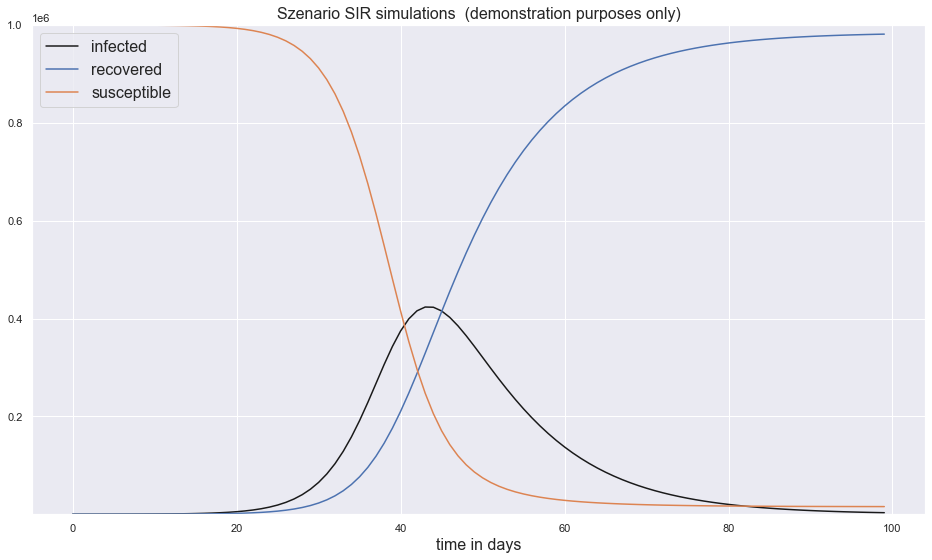

In [18]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});